"We certify that the code and data in this assignment were generated independently, using only the tools and resources defined in the course and that we did not receive any external help, coaching or contributions during the production of this work."<br>

Ram Chandra Bhavirisetty<br>
Tejaswi Raavi


## **<center>ASSIGNMENT 4</center>**
# **<center>PART  1</center>**
**<center>THEME :**
**' SNAKE AND LADDER ' GRID WORLD WHERE LADDERS ARE OF POSITIVE REWARD AND SNAKES ARE OF NEGATIVE REWARD.</center>**



**<center> -------------------------  REQUIRED PACKAGES ARE IMPORTED  ------------------------- </center>**

In [5]:
import gym
from gym import spaces
from google.colab import widgets
import time
from matplotlib import pyplot as plt
import seaborn as sb
import numpy as np
import pandas as pd

**<center> -------------------------  GRID WORLD CLASS   ------------------------- <center>**

In [108]:
class Field(gym.Env):

  def __init__(self):
    self.observation_space = spaces.Discrete(36)
    self.action_space = spaces.Discrete(4)
    self.max_timesteps = 20

  def reset(self):
    self.step_count = 0
    self.player = [0, 0]
    self.ladder1 = [4,0]
    self.ladder2 = [2,0]
    self.snake1 = [3,2]
    self.snake2 = [3,3]
    self.goal = [5, 5]
    self.field = np.zeros((6,6))
    self.field[tuple(self.player)] = 1
    self.field[tuple(self.goal)] = 10
    self.field[tuple(self.ladder1)] = 7
    self.field[tuple(self.ladder2)] = 4
    self.field[tuple(self.snake1)] = -1
    self.field[tuple(self.snake2)] = -2
    self.field_ids = np.array([i for i in range(36)]).reshape((6,6))
    self.observation = self.field.flatten()

  def step(self, action):
    self.field = np.random.choice(self.observation_space.n)
    if action == 0:
      self.player[0] += 1
    if action == 1:
      self.player[0] -= 1
    if action == 2:
      self.player[1] += 1
    if action == 3:
      self.player[1] -= 1
    
    self.player = np.clip(self.player, 0, 5)
    self.field = np.zeros((6,6))
    self.field[tuple(self.player)] = 1
    self.field[tuple(self.snake1)] = -3
    self.field[tuple(self.snake2)] = -7
    self.field[tuple(self.ladder1)] = 4
    self.field[tuple(self.ladder2)] = 6
    self.field[tuple(self.goal)] = 10
    observation = self.field.flatten()
    reward = 0
    self.step_count += 1
    done = True if self.step_count >= self.max_timesteps else False
    info = {}
    return observation, reward, done, info

  def render(self):
    sb.heatmap(self.field, annot = True, linewidth = 1, cmap = 'Blues')

**<center> -------------------------  RANDOM AGENT   CLASS------------------------- <center>**

In [109]:
class randomAgent:
  def __init__(self, env):
    self.env = env
    self.observation_space = env.observation_space
    self.action_space = env.action_space

  def step(self, observation):
    return np.random.choice(self.action_space.n)

**<center> ------------------------- OBJECTS ARE CREATED FOR ENVIRONMENT AND RANDOM AGENT  ------------------------- <center>**

In [130]:
env = Field()
agent = randomAgent(env)
env.reset()

**<center> -------------------------  AGENT's TRAVEL WITHIN THE GRID WORLD  ------------------------- <center>**

""


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

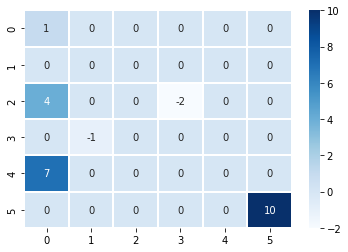

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

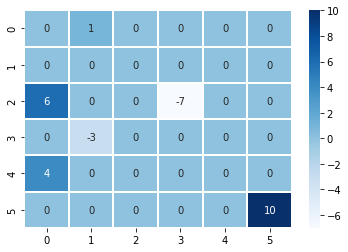

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

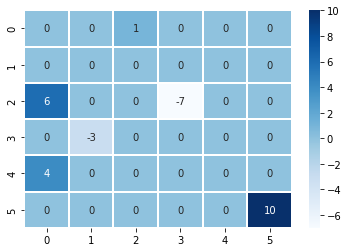

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

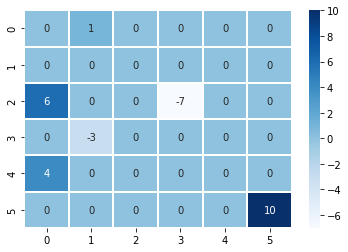

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

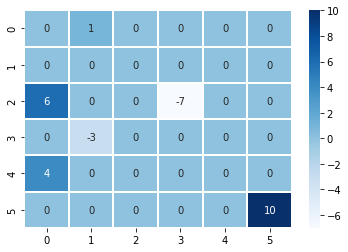

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

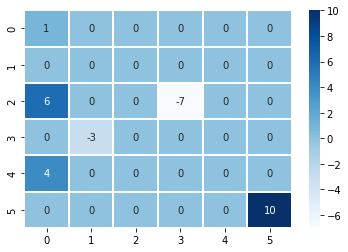

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

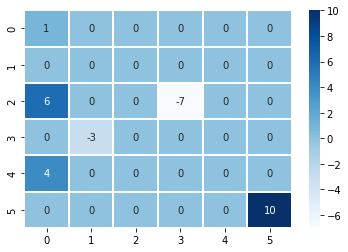

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

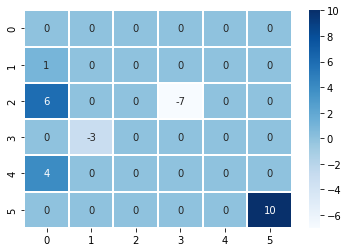

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

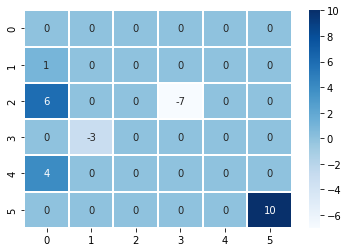

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

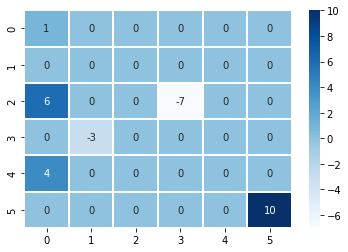

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

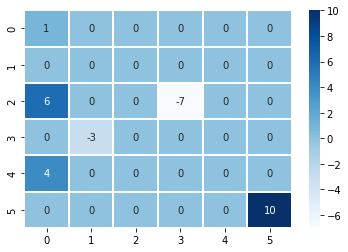

<IPython.core.display.Javascript object>

In [131]:
done = False
observation = 0
output_grid = widgets.Grid(1, 1)
with output_grid.output_to(0, 0):
  env.render()
while not done:
  action = agent.step(observation)
  observation, reward, done, info = env.step(action)
  with output_grid.output_to(0, 0):
    env.render()
  time.sleep(1)

**<center>  ----------------------------- ' SNAKE & LADDER ' GRID WORLD REPRESENTATION     -----------------------------    </center>**

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

NUMERICAL REPRESENTATION

[[ 1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.]
 [ 4.  0.  0. -2.  0.  0.]
 [ 0. -1.  0.  0.  0.  0.]
 [ 7.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0. 10.]]

GRAPHICAL REPRESENTATION


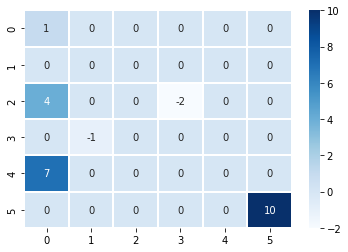

<IPython.core.display.Javascript object>

In [132]:

with output_grid.output_to(0, 0):
  output_grid.clear_cell()
  env.reset()
  print("NUMERICAL REPRESENTATION\n")
  print(env.field)
  print("\nGRAPHICAL REPRESENTATION")
  env.render()

## **<center>PART  2</center>**

**<center> ----------------------- CREATING 'SNAKE & LADDER' GRID WORLD  -----------------------</center>**

In [18]:
class Field(gym.Env):
  metadata = { 'render.modes': []}

  def __init__(self):
    self.observation_space = spaces.Discrete(36)
    self.action_space = spaces.Discrete(4)
    self.max_timesteps = 110

  def reset(self):
    self.step_count = 0
    self.player = [0, 0]
    self.ladder1 = [4,0]
    self.ladder2 = [2,0]
    self.snake1 = [3,2]
    self.snake2 = [3,3]
    self.goal = [5, 5]
    self.field = np.zeros((6,6))
    self.field[tuple(self.player)] = 1
    self.field[tuple(self.goal)] = 10
    self.field[tuple(self.ladder1)] = 7
    self.field[tuple(self.ladder2)] = 4
    self.field[tuple(self.snake1)] = -1
    self.field[tuple(self.snake2)] = -2
    self.field_ids = np.array([i for i in range(36)]).reshape((6,6))
    self.observation = self.field.flatten()

  def step(self, action):
    self.field = np.random.choice(self.observation_space.n)
    #[0,1,2,3],['UP','DOWN','RIGHT','LEFT']
    if action == 0:
      self.player[1] += 1
    if action == 1:
      self.player[1] -= 1
    if action == 2:
      self.player[0] += 1
    if action == 3:
      self.player[0] -= 1

    self.player = np.clip(self.player, 0, 5)
    self.field = np.zeros((6,6))
    self.field[tuple(self.player)] = 1
    self.field[tuple(self.goal)] = 10
    self.field[tuple(self.ladder1)] = 7
    self.field[tuple(self.ladder2)] = 4
    self.field[tuple(self.snake1)] = -1
    self.field[tuple(self.snake2)] = -2
    observation = self.field.flatten()
    self.step_count += 1    
    info = {}
    state = self.field_ids[tuple(self.player)]
    reward = self.observation[state] 
    done = True if (state == 35) or (env.step_count >= env.max_timesteps) else False
    return reward, done, int(state), info

  def render(self):
    sb.heatmap(self.field, annot = True, linewidth = 1, cmap = 'Blues')

**<center>  -------------------------  *SARSA IMPLEMENTATION* ------------------------- <center>**

In [19]:
class randomAgent():
  def __init__(self,env):
    self.actions = env.action_space
    self.states = env.field
    self.epsilon = 1
    self.alpha = 0.9
    self.gamma = 0.7
    self.Q = np.zeros((36,4))
  
  def think(self,state):
    action = 0
    if np.random.uniform(0,1) < self.epsilon:
      action = self.actions.sample()
    else:
      action = np.argmax(self.Q[state,:])
    return action
  
  def q_update(self,state,action,state2,action2,reward):
    pred = self.Q[state,action]
    future_rwd = reward + self.gamma * self.Q[state2,action2]
    self.Q[state,action] = self.Q[state,action] + self.alpha*(future_rwd - pred)


**<center>------------------  TRAINING THE AGENT ------------------ <br> EPISODES = 10000 || EPSILON = 0.9 || ALPHA = 0.9 || GAMMA = 0.7 <center>**

In [20]:
env = Field()
env.reset()
agent = randomAgent(env)

In [21]:
state = env.field[tuple([0,0])]
epsilon_values = []
penalities = []
no_of_times_acheived_goal = []
rewardslist = []
average_timesteps = []
acheived_goal = 0
pnlty = 0
episodes = 10000

print("TRAINING STARTED")

for i in range(episodes):
  env.reset()
  done = False
  state = 0
  total_reward = 0
  action = agent.think(state)

  while not done:
    reward,done,state2,info = env.step(action)
    if state2 in [env.field_ids[tuple(env.snake1)], env.field_ids[tuple(env.snake2)]]:
      pnlty+=1    
    if state2 == 35:
      acheived_goal+=1

    action2 = agent.think(state2)
    agent.q_update(state,action,state2,action2,reward)
    state = state2
    action = action2
    agent.epsilon = 0.01 + (0.99)*np.exp(-0.001*i)
    total_reward = total_reward + reward    
    if done:
      break
  epsilon_values.append(agent.epsilon)
  p = (env.step_count/env.max_timesteps)*100
  average_timesteps.append(p)
  check_100 = (i+1) % 100
  if not check_100:   
    #print("inininin") 
    penalities.append(pnlty)
    pnlty = 0
    no_of_times_acheived_goal.append(acheived_goal)
    acheived_goal = 0
  rewardslist.append(total_reward)

print('---------------------------')
print("TRAINING ENDED")

TRAINING STARTED
---------------------------
TRAINING ENDED


**<center> --------------------------- *PLOTTING TOTAL REWARDS PER EPISODE* --------------------------- </center>**

Text(0, 0.5, 'TOTAL_REWARD PER EPISODE ')

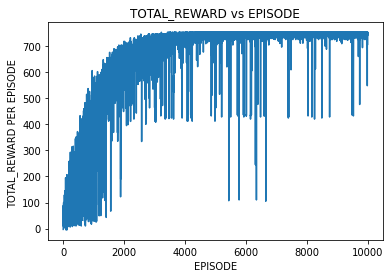

In [22]:
plt.plot(list(range(episodes)),rewardslist)
plt.title("TOTAL_REWARD vs EPISODE")
plt.xlabel("EPISODE")
plt.ylabel("TOTAL_REWARD PER EPISODE ")

**<center> --------------------------- *PLOTTING EPSILON DECAY PER EPISODE* --------------------------- </center>**

Text(0.5, 0, 'EPISODE')

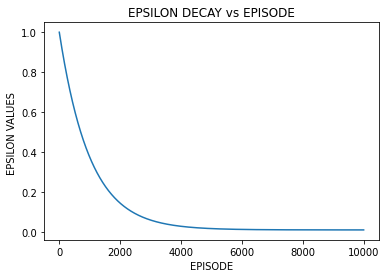

In [23]:
plt.plot(list(range(episodes)),epsilon_values)
plt.title("EPSILON DECAY vs EPISODE")
plt.ylabel("EPSILON VALUES ")
plt.xlabel("EPISODE")

**<center> --------------------------- PLOTTING AVERAGE NUMBER OF TIMESTEPS PER EPISODE  --------------------------- </center>**

Text(0, 0.5, 'AVERAGE NO.OF TIMESTEPS')

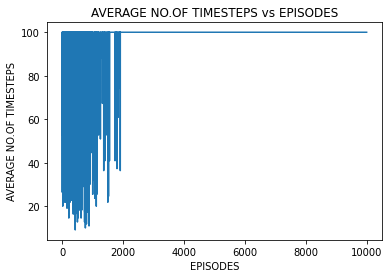

In [37]:
plt.plot(list(range(len(average_timesteps))),average_timesteps)
plt.title("AVERAGE NO.OF TIMESTEPS vs EPISODES")
plt.xlabel("EPISODES")
plt.ylabel("AVERAGE NO.OF TIMESTEPS")

**<center> --------------------------- PLOTTING NUMBER OF TIMES AGENT GOT PENALITY PER EPISODE FOR EVERY 100 EPISODES  --------------------------- </center>**

Text(0, 0.5, 'NO.OF TIMES AGENT GOT PENALITY')

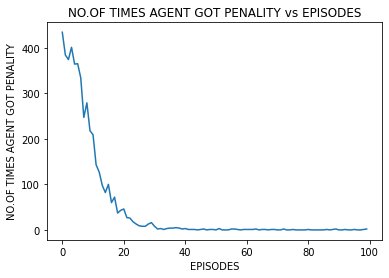

In [36]:
episodes_count = list(range(len(penalities)))
plt.plot(episodes_count,penalities)
plt.title("NO.OF TIMES AGENT GOT PENALITY vs EPISODES")
plt.xlabel("EPISODES")
plt.ylabel("NO.OF TIMES AGENT GOT PENALITY")

**<center> --------------------------- PLOTTING NUMBER OF TIMES AGENT ACHIEVED GOAL PER EPISODE FOR EVERY 100 EPISODES  --------------------------- </center>**

Text(0, 0.5, 'NO.OF AGENT REACHED GOAL')

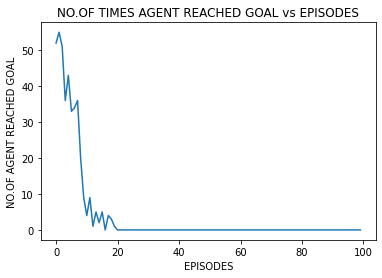

In [35]:
plt.plot(list(range(len(no_of_times_acheived_goal))),no_of_times_acheived_goal)
plt.title("NO.OF TIMES AGENT REACHED GOAL vs EPISODES")
plt.xlabel("EPISODES")
plt.ylabel("NO.OF AGENT REACHED GOAL")

**<center> ----------------------------------- Q TABLE ----------------------------------- </center>**

In [38]:
episodes = zip(list(range(0,36)),,agent.Q)
dict(episodes)

{0: array([2.91266388, 6.05313511, 9.5197179 , 6.77364796]),
 1: array([2.04297066, 3.73486737, 6.94103212, 2.98105156]),
 2: array([0.34376224, 1.89488519, 0.4952092 , 0.34822013]),
 3: array([0.20621   , 0.99914941, 0.13163882, 0.46658441]),
 4: array([0.06827865, 0.36009044, 0.03734174, 0.00658041]),
 5: array([0.86996254, 0.33040081, 2.05380739, 0.9433232 ]),
 6: array([ 7.39816801,  7.33058219, 14.92510518,  4.55536219]),
 7: array([ 3.67337459, 10.55448308,  3.58079459,  2.67174328]),
 8: array([0.32745345, 6.25368362, 0.91703689, 0.33737531]),
 9: array([ 0.26456926,  0.50075683, -1.59210998,  0.05698367]),
 10: array([-0.00220549,  0.90654762, -0.29471264,  0.07202207]),
 11: array([0.00748961, 1.16300747, 2.3685215 , 0.09930405]),
 12: array([ 7.61921372,  9.99854641, 16.25772532,  6.61506283]),
 13: array([ 4.34162352, 11.05902241,  5.47034632,  3.94384318]),
 14: array([-1.7764708 ,  0.95798194,  6.42194826,  1.50367002]),
 15: array([ 1.79596114,  3.11600146, -0.10004851,  

**<center> -------------------------- HYPERPARAMETER TUNING FOR EPISODES & GAMMA ---------------------------- </center>**

In [16]:
def tuning(episodes,gamma):
  class Field(gym.Env):
    metadata = { 'render.modes': []}

    def __init__(self):
      self.observation_space = spaces.Discrete(36)
      self.action_space = spaces.Discrete(4)
      self.max_timesteps = 110

    def reset(self):
      self.step_count = 0
      self.player = [0, 0]
      self.ladder1 = [4,0]
      self.ladder2 = [2,0]
      self.snake1 = [3,1]
      self.snake2 = [2,3]
      self.goal = [5, 5]
      self.field = np.zeros((6,6))
      self.field[tuple(self.player)] = 1
      self.field[tuple(self.goal)] = 10
      self.field[tuple(self.ladder1)] = 7
      self.field[tuple(self.ladder2)] = 4
      self.field[tuple(self.snake1)] = -1
      self.field[tuple(self.snake2)] = -2
      self.field_ids = np.array([i for i in range(36)]).reshape((6,6))
      self.observation = self.field.flatten()

    def step(self, action):
      self.field = np.random.choice(self.observation_space.n)
      #[0,1,2,3],['UP','DOWN','RIGHT','LEFT']
      if action == 0:
        self.player[1] += 1
      if action == 1:
        self.player[1] -= 1
      if action == 2:
        self.player[0] += 1
      if action == 3:
        self.player[0] -= 1

      self.player = np.clip(self.player, 0, 5)
      self.field = np.zeros((6,6))
      self.field[tuple(self.player)] = 1
      self.field[tuple(self.goal)] = 10
      self.field[tuple(self.ladder1)] = 7
      self.field[tuple(self.ladder2)] = 4
      self.field[tuple(self.snake1)] = -1
      self.field[tuple(self.snake2)] = -2
      observation = self.field.flatten()
      self.step_count += 1    
      info = {}
      state = self.field_ids[tuple(self.player)]
      reward = self.observation[state] 
      done = True if (state == 35) or (env.step_count >= env.max_timesteps) else False

      return reward, done, int(state), info


    def render(self):
      sb.heatmap(self.field, annot = True, linewidth = 1, cmap = 'Blues')

  class randomAgent():
    def __init__(self,env):
      self.actions = env.action_space
      self.states = env.field
      self.epsilon = 0.9
      self.alpha = 0.9
      self.gamma = 0.7
      self.Q = np.zeros((36,4))
    
    def think(self,state):
      action = 0
      if np.random.uniform(0,1) < self.epsilon:
        action = self.actions.sample()
      else:
        action = np.argmax(self.Q[state,:])
      return action
    
    def q_update(self,state,action,state2,action2,reward):
      pred = self.Q[state,action]
      future_rwd = reward + self.gamma * self.Q[state2,action2]
      self.Q[state,action] = self.Q[state,action] + self.alpha*(future_rwd - pred)

  env = Field()
  env.reset()
  agent = randomAgent(env)

  state = env.field[tuple([0,0])]
  epsilon_values = []
  penalities = []
  no_of_times_acheived_goal = []
  rewardslist = []
  average_timesteps = []
  acheived_goal = 0
  pnlty = 0
  episodes = episodes
  agent.gamma = gamma

  print("TRAINING STARTED")

  for i in range(episodes):
    env.reset()
    done = False
    state = 0
    total_reward = 0
    action = agent.think(state)

    while not done:
      reward,done,state2,info = env.step(action)
      #print("EPISODE: ",i," ",reward)
      if state2 in [env.field_ids[tuple(env.snake1)], env.field_ids[tuple(env.snake2)]]:
        pnlty+=1    
      if state2 == 35:
        acheived_goal+=1

      action2 = agent.think(state2)
      agent.q_update(state,action,state2,action2,reward)
      state = state2
      action = action2
      agent.epsilon = 0.01 + (0.99)*np.exp(-0.001*i)
      total_reward = total_reward + reward    
      #print("-=-=-=-=-=-=-=-")
      if done:
        break

    epsilon_values.append(agent.epsilon)
    p = (env.step_count/env.max_timesteps)*100
    average_timesteps.append(p)
    check_100 = (i+1) % 100
    if not check_100:   
      #print("inininin") 
      penalities.append(pnlty)
      pnlty = 0
      no_of_times_acheived_goal.append(acheived_goal)
      acheived_goal = 0
    rewardslist.append(total_reward)

  print('---------------------------')
  print("TRAINING ENDED")
  return rewardslist,agent.Q


**<center> -------------------------- EPISODES = 1000 || GAMMA = 0.7 -------------------------- <center>**

TRAINING STARTED
---------------------------
TRAINING ENDED
-=-=-=-=-=-=-=-=-=-=-=-=-=-=-


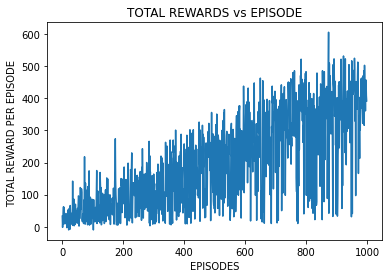

In [17]:
episodes = 1000
gamma = 0.7
rewardslist,Q_vals = tuning(episodes,gamma)

plt.title("TOTAL REWARDS vs EPISODE")
plt.xlabel("EPISODES")
plt.ylabel("TOTAL REWARD PER EPISODE ")
plt.plot(list(range(episodes)),rewardslist)
print("-=-=-=-=-=-=-=-=-=-=-=-=-=-=-")

In [83]:
episodes = zip(list(range(0,36)),Q_vals)
dict(episodes)

{0: array([2.23470687, 3.33714128, 7.07047908, 2.80249444]),
 1: array([0.98514227, 4.65553435, 0.33160334, 0.90268059]),
 2: array([0.09710251, 3.37841159, 0.84928131, 1.32732706]),
 3: array([0.01148467, 1.63346361, 0.61720056, 0.13297222]),
 4: array([ 0.0006508 , -0.06280134, -0.07737637, -0.57962482]),
 5: array([1.16760322, 0.01589532, 0.77143482, 0.39438642]),
 6: array([ 3.19835262,  2.96969701, 10.26802295,  3.14810744]),
 7: array([0.90435274, 7.38156179, 6.47929889, 2.21417161]),
 8: array([0.60410096, 2.29438996, 0.4545744 , 0.04680072]),
 9: array([ 0.07432156,  3.67407469, -1.7012271 , -0.00900623]),
 10: array([ 0.38590141, -0.9155815 , -0.58644277, -0.50233599]),
 11: array([ 0.19016564, -0.01921804,  1.47330534,  0.05372715]),
 12: array([3.49760543, 5.42126778, 4.70198589, 1.80571889]),
 13: array([5.08718925, 8.91196079, 0.3356602 , 4.92422122]),
 14: array([-0.90347201,  7.20581767,  3.99831822,  0.47553283]),
 15: array([-0.29260919,  2.66905259,  0.92883743,  0.61

**<center> -------------------------- EPISODES = 5000 || GAMMA = 0.7 -------------------------- <center>**

TRAINING STARTED
---------------------------
TRAINING ENDED
-=-=-=-=-=-=-=-=-=-=-=-=-=-=-


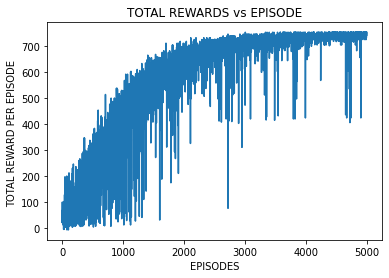

In [103]:
episodes = 5000
gamma = 0.7
rewardslist,Q_vals = tuning(episodes,gamma)

plt.title("TOTAL REWARDS vs EPISODE")
plt.xlabel("EPISODES")
plt.ylabel("TOTAL REWARD PER EPISODE ")
plt.plot(list(range(episodes)),rewardslist)
print("-=-=-=-=-=-=-=-=-=-=-=-=-=-=-")

In [104]:
episodes = zip(list(range(0,36)),Q_vals)
dict(episodes)

{0: array([ 3.93551067,  6.68612274, 10.61374444,  6.59749348]),
 1: array([1.24901382, 4.65221067, 1.85591602, 3.28097307]),
 2: array([1.10165837, 0.45389692, 3.7739183 , 0.45975222]),
 3: array([0.2893614 , 0.94069011, 0.23731426, 0.32036776]),
 4: array([0.17225981, 0.13918392, 0.00564689, 0.0057257 ]),
 5: array([ 0.04477808, -0.45932785,  0.91031783,  0.01209638]),
 6: array([ 7.18348391,  9.8167885 , 14.21638564,  7.74363685]),
 7: array([3.38613724, 3.43997242, 7.7076187 , 2.28827055]),
 8: array([0.18788756, 1.4726561 , 5.39019929, 1.32527957]),
 9: array([-0.96348385, -0.91700423, -2.34833824,  0.59085327]),
 10: array([0.16218445, 0.32543161, 0.44500173, 0.06092884]),
 11: array([0.03880652, 1.31501055, 0.09219361, 0.14639009]),
 12: array([ 7.72447045,  9.40529967, 15.94195935,  9.20226975]),
 13: array([ 7.06383874, 11.05341493,  8.11963212,  3.63620557]),
 14: array([-2.64063654,  9.61618715,  1.18351032,  1.66771057]),
 15: array([ 1.12619925, -0.68701307,  1.87593902,  

**<center> -------------------------- EPISODES = 10000 || GAMMA = 0.7 -------------------------- <center>**

TRAINING STARTED
---------------------------
TRAINING ENDED
-=-=-=-=-=-=-=-=-=-=-=-=-=-=-


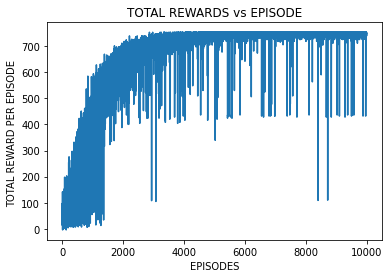

In [84]:
episodes = 10000
gamma = 0.7
rewardslist,Q_vals = tuning(episodes,gamma)

plt.title("TOTAL REWARDS vs EPISODE")
plt.xlabel("EPISODES")
plt.ylabel("TOTAL REWARD PER EPISODE ")
plt.plot(list(range(episodes)),rewardslist)
print("-=-=-=-=-=-=-=-=-=-=-=-=-=-=-")

In [86]:
episodes = zip(list(range(0,36)),Q_vals)
dict(episodes)

{0: array([ 4.89372186,  3.81961576, 10.80332137,  4.66098637]),
 1: array([1.57551985, 8.39171797, 1.87056936, 2.40019752]),
 2: array([1.00311667, 2.92500886, 0.66214837, 0.57489412]),
 3: array([ 0.04746225,  2.75917268, -0.4627187 ,  0.22097484]),
 4: array([-0.01468611,  0.07226538, -0.67732325,  0.07987152]),
 5: array([-0.00055474,  0.01169392,  0.07079384,  0.29291878]),
 6: array([ 5.46870979,  5.41172754, 14.32690513,  5.27135788]),
 7: array([ 3.11050938,  3.58819103, 10.22777301,  2.75237409]),
 8: array([-0.45001845,  6.0869964 ,  1.5500917 ,  0.7247911 ]),
 9: array([ 0.01855378,  0.27010958, -0.08639345,  0.58407204]),
 10: array([ 0.15571164, -1.03531987, -0.04136367,  0.16736299]),
 11: array([ 0.12450132, -0.71576228,  1.04427746, -0.1742423 ]),
 12: array([ 8.31039271, 13.70488835, 15.9802671 ,  9.22091897]),
 13: array([ 3.06535031, 10.89506164,  7.65614516,  4.71411846]),
 14: array([-0.17148634,  1.33780626,  2.87122272,  1.20423528]),
 15: array([2.30584173, 1.42

**<center> -------------------------- EPISODES = 10000 || GAMMA = 0.95 -------------------------- <center>**

TRAINING STARTED
---------------------------
TRAINING ENDED
-=-=-=-=-=-=-=-=-=-=-=-=-=-=-


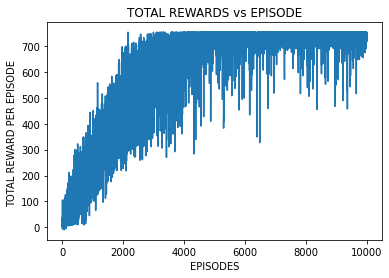

In [96]:
episodes = 10000
gamma = 0.95
rewardslist,Q_vals = tuning(episodes,gamma)

plt.title("TOTAL REWARDS vs EPISODE")
plt.xlabel("EPISODES")
plt.ylabel("TOTAL REWARD PER EPISODE ")
plt.plot(list(range(episodes)),rewardslist)
print("-=-=-=-=-=-=-=-=-=-=-=-=-=-=-")

In [97]:
episodes = zip(list(range(0,36)),Q_vals)
dict(episodes)

{0: array([102.64171166,  73.82547519, 122.68974647,  71.77779555]),
 1: array([49.78470492, 99.60482109, 40.79857298, 55.75344892]),
 2: array([16.98741648, 21.72329424, 80.36752739, 21.26400511]),
 3: array([14.7429771 , 34.86554594, 30.41223004, 23.96614183]),
 4: array([14.72809197, 23.54412618, 13.50672659, 13.46136716]),
 5: array([ 5.55690048, 15.74855388,  6.30303708,  7.92241787]),
 6: array([ 82.5902336 ,  83.53960132, 113.9461987 ,  77.34721037]),
 7: array([68.70237712, 81.76952612, 79.01502385, 50.98302458]),
 8: array([ 27.02712844,  42.14527001, 110.01197889,  25.68773362]),
 9: array([25.73117892, 53.06791782, 20.96647991, 15.308892  ]),
 10: array([12.55640204, 17.19319913, 39.77438875, 16.72666663]),
 11: array([ 4.21486572,  4.32114455,  9.03943745, 14.33184888]),
 12: array([ 81.63162466,  85.83921202, 129.0658838 ,  82.57327298]),
 13: array([67.30036122, 84.15007438, 84.7123992 , 78.17990757]),
 14: array([ 27.13071575, 114.17382494,  36.44330828,  17.97894995]),


**<center> -------------------------- EPISODES = 10000 || GAMMA = 0.5 -------------------------- <center>**

TRAINING STARTED
---------------------------
TRAINING ENDED
-=-=-=-=-=-=-=-=-=-=-=-=-=-=-


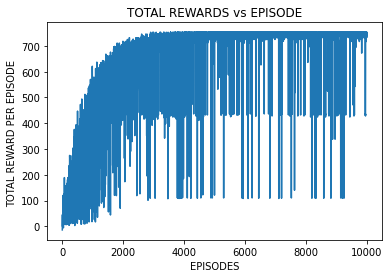

In [98]:
episodes = 10000
gamma = 0.5
rewardslist,Q_vals = tuning(episodes,gamma)

plt.title("TOTAL REWARDS vs EPISODE")
plt.xlabel("EPISODES")
plt.ylabel("TOTAL REWARD PER EPISODE ")
plt.plot(list(range(episodes)),rewardslist)
print("-=-=-=-=-=-=-=-=-=-=-=-=-=-=-")

In [99]:
episodes = zip(list(range(0,36)),Q_vals)
dict(episodes)

{0: array([1.43458061, 2.75208018, 3.73637624, 2.86987879]),
 1: array([0.49627818, 2.98129135, 1.10987104, 0.91033404]),
 2: array([-0.02844293,  1.31075446,  0.230207  ,  0.18122515]),
 3: array([-0.00049597,  0.01480172,  0.02384031,  0.0227532 ]),
 4: array([ 0.20536427, -0.01151767, -0.03635229, -0.01570631]),
 5: array([-0.00173199, -0.15067717,  0.58696358, -0.00223307]),
 6: array([1.87487753, 3.74841299, 7.1476233 , 2.00031803]),
 7: array([0.14055869, 3.60976183, 0.82659063, 0.78417519]),
 8: array([0.03146913, 0.19826751, 0.02951343, 0.29042662]),
 9: array([ 0.01559458,  0.22871933, -1.70345968, -0.1452257 ]),
 10: array([ 0.18039713, -0.76398023, -0.87657057, -0.16691612]),
 11: array([ 0.20383794,  0.02070029,  1.24205605, -0.00130963]),
 12: array([3.74609747, 4.95878281, 6.84441344, 3.55064839]),
 13: array([1.71815423, 7.94969468, 2.39315189, 1.75953051]),
 14: array([-1.85701009,  3.51431348,  0.3290855 ,  0.25387115]),
 15: array([ 0.11337165,  1.59420751,  0.1252104

**<center> -------------------------- EPISODES = 10000 || GAMMA = 0.2 -------------------------- <center>**

TRAINING STARTED
---------------------------
TRAINING ENDED
-=-=-=-=-=-=-=-=-=-=-=-=-=-=-


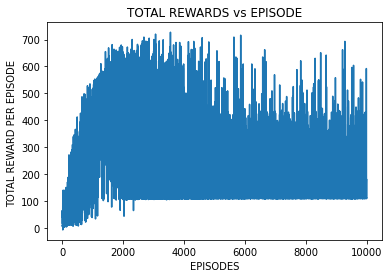

In [100]:
episodes = 10000
gamma = 0.2
rewardslist,Q_vals = tuning(episodes,gamma)

plt.title("TOTAL REWARDS vs EPISODE")
plt.xlabel("EPISODES")
plt.ylabel("TOTAL REWARD PER EPISODE ")
plt.plot(list(range(episodes)),rewardslist)
print("-=-=-=-=-=-=-=-=-=-=-=-=-=-=-")

In [102]:
episodes = zip(list(range(0,36)),Q_vals)
dict(episodes)

{0: array([0.24992813, 1.25      , 0.97634989, 1.25      ]),
 1: array([0.04945167, 1.21757163, 0.19910201, 0.24840182]),
 2: array([0.00226699, 0.24324906, 0.03813883, 0.04259245]),
 3: array([ 0.00031043,  0.0486343 , -0.03415456,  0.0004239 ]),
 4: array([ 7.84711424e-05,  8.90243022e-03,  1.90741495e-05, -9.08131208e-06]),
 5: array([-1.37860740e-04, -1.39095693e-04,  7.11234060e-06,  1.70372272e-05]),
 6: array([0.19956732, 0.9995461 , 4.88263643, 1.24089301]),
 7: array([0.01066891, 0.97663493, 0.04704113, 0.0592543 ]),
 8: array([0.000516  , 0.19244185, 0.0090166 , 0.00998166]),
 9: array([ 4.12999066e-05, -6.85478322e-03, -1.99638871e+00,  8.29251185e-03]),
 10: array([ 2.17372842e-04, -1.19442990e-05, -3.61246937e-01,  3.11076893e-04]),
 11: array([-3.44142652e-06,  2.76499523e-04,  6.87157824e-04,  2.20555450e-05]),
 12: array([0.97113994, 5.        , 1.74999996, 0.99805997]),
 13: array([ 0.19419746,  4.85495413, -0.68554171,  0.19741015]),
 14: array([-1.99352127,  0.970990

**<center> ------------------------------------ TRANING THE AGENT USING THE BEST VALUES OBTAINED FROM HYPERPARAMETER TUNING ------------------------------------ <br> EPISODES = 10000 || EPSILON = 0.9 || ALPHA = 0.9 || GAMMA = 0.95 </center>**

In [6]:
def tuning():
  class Field(gym.Env):
    metadata = { 'render.modes': []}

    def __init__(self):
      self.observation_space = spaces.Discrete(36)
      self.action_space = spaces.Discrete(4)
      self.max_timesteps = 110

    def reset(self):
      self.step_count = 0
      self.player = [0, 0]
      self.ladder1 = [4,0]
      self.ladder2 = [2,0]
      self.snake1 = [3,1]
      self.snake2 = [2,3]
      self.goal = [5, 5]
      self.field = np.zeros((6,6))
      self.field[tuple(self.player)] = 1
      self.field[tuple(self.goal)] = 10
      self.field[tuple(self.ladder1)] = 7
      self.field[tuple(self.ladder2)] = 4
      self.field[tuple(self.snake1)] = -1
      self.field[tuple(self.snake2)] = -2
      self.field_ids = np.array([i for i in range(36)]).reshape((6,6))
      self.observation = self.field.flatten()

    def step(self, action):
      self.field = np.random.choice(self.observation_space.n)
      #[0,1,2,3],['UP','DOWN','RIGHT','LEFT']
      if action == 0:
        self.player[1] += 1
      if action == 1:
        self.player[1] -= 1
      if action == 2:
        self.player[0] += 1
      if action == 3:
        self.player[0] -= 1

      self.player = np.clip(self.player, 0, 5)
      self.field = np.zeros((6,6))
      self.field[tuple(self.player)] = 1
      self.field[tuple(self.goal)] = 10
      self.field[tuple(self.ladder1)] = 7
      self.field[tuple(self.ladder2)] = 4
      self.field[tuple(self.snake1)] = -1
      self.field[tuple(self.snake2)] = -2
      observation = self.field.flatten()
      self.step_count += 1    
      info = {}
      state = self.field_ids[tuple(self.player)]
      reward = self.observation[state] 
      done = True if (state == 35) or (env.step_count >= env.max_timesteps) else False

      return reward, done, int(state), info


    def render(self):
      sb.heatmap(self.field, annot = True, linewidth = 1, cmap = 'Blues')

  class randomAgent():
    def __init__(self,env):
      self.actions = env.action_space
      self.states = env.field
      self.epsilon = 0.9
      self.alpha = 0.9
      self.gamma = 0.95
      self.Q = np.zeros((36,4))
    
    def think(self,state):
      action = 0
      if np.random.uniform(0,1) < self.epsilon:
        action = self.actions.sample()
      else:
        action = np.argmax(self.Q[state,:])
      return action
    
    def q_update(self,state,action,state2,action2,reward):
      pred = self.Q[state,action]
      future_rwd = reward + self.gamma * self.Q[state2,action2]
      self.Q[state,action] = self.Q[state,action] + self.alpha*(future_rwd - pred)

  env = Field()
  env.reset()
  agent = randomAgent(env)

  state = env.field[tuple([0,0])]
  epsilon_values = []
  penalities = []
  no_of_times_acheived_goal = []
  rewardslist = []
  average_timesteps = []
  acheived_goal = 0
  pnlty = 0
  episodes = 10000

  print("TRAINING STARTED")

  for i in range(episodes):
    env.reset()
    done = False
    state = 0
    total_reward = 0
    action = agent.think(state)

    while not done:
      reward,done,state2,info = env.step(action)
      #print("EPISODE: ",i," ",reward)
      if state2 in [env.field_ids[tuple(env.snake1)], env.field_ids[tuple(env.snake2)]]:
        pnlty+=1    
      if state2 == 35:
        acheived_goal+=1

      action2 = agent.think(state2)
      agent.q_update(state,action,state2,action2,reward)
      state = state2
      action = action2
      agent.epsilon = 0.01 + (0.99)*np.exp(-0.001*i)
      total_reward = total_reward + reward    
      #print("-=-=-=-=-=-=-=-")
      if done:
        break

    epsilon_values.append(agent.epsilon)
    p = (env.step_count/env.max_timesteps)*100
    average_timesteps.append(p)
    check_100 = (i+1) % 100
    if not check_100:   
      #print("inininin") 
      penalities.append(pnlty)
      pnlty = 0
      no_of_times_acheived_goal.append(acheived_goal)
      acheived_goal = 0
    rewardslist.append(total_reward)

  print('---------------------------')
  print("TRAINING ENDED")
  return rewardslist,agent.Q


In [7]:
reward,Q_vals = tuning()
#dict(zip(list(range(0,36)),Q_vals))

TRAINING STARTED
---------------------------
TRAINING ENDED


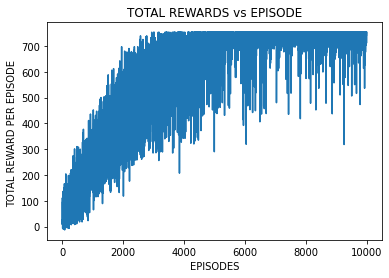

In [11]:
plt.title("TOTAL REWARDS vs EPISODE")
plt.xlabel("EPISODES")
plt.ylabel("TOTAL REWARD PER EPISODE ")
plt.plot(list(range(len(reward))),reward)

**<center> --------------- LETTING AGENT CHOOSE ONLY GREEDY ACTIONS FOR 10 EPISODES USING THE OBTAINED Q VALUES FROM THE ABOVE TRANING ------------------</center>**

In [12]:
def tuning(Q_vals,epsilon):
  class Field(gym.Env):
    metadata = { 'render.modes': []}

    def __init__(self):
      self.observation_space = spaces.Discrete(36)
      self.action_space = spaces.Discrete(4)
      self.max_timesteps = 110

    def reset(self):
      self.step_count = 0
      self.player = [0, 0]
      self.ladder1 = [4,0]
      self.ladder2 = [2,0]
      self.snake1 = [3,1]
      self.snake2 = [2,3]
      self.goal = [5, 5]
      self.field = np.zeros((6,6))
      self.field[tuple(self.player)] = 1
      self.field[tuple(self.goal)] = 10
      self.field[tuple(self.ladder1)] = 7
      self.field[tuple(self.ladder2)] = 4
      self.field[tuple(self.snake1)] = -1
      self.field[tuple(self.snake2)] = -2
      self.field_ids = np.array([i for i in range(36)]).reshape((6,6))
      self.observation = self.field.flatten()

    def step(self, action):
      self.field = np.random.choice(self.observation_space.n)
      #[0,1,2,3],['UP','DOWN','RIGHT','LEFT']
      if action == 0:
        self.player[1] += 1
      if action == 1:
        self.player[1] -= 1
      if action == 2:
        self.player[0] += 1
      if action == 3:
        self.player[0] -= 1

      self.player = np.clip(self.player, 0, 5)
      self.field = np.zeros((6,6))
      self.field[tuple(self.player)] = 1
      self.field[tuple(self.goal)] = 10
      self.field[tuple(self.ladder1)] = 7
      self.field[tuple(self.ladder2)] = 4
      self.field[tuple(self.snake1)] = -1
      self.field[tuple(self.snake2)] = -2
      observation = self.field.flatten()
      self.step_count += 1    
      info = {}
      state = self.field_ids[tuple(self.player)]
      reward = self.observation[state] 
      done = True if (state == 35) or (env.step_count >= env.max_timesteps) else False

      return reward, done, int(state), info


    def render(self):
      sb.heatmap(self.field, annot = True, linewidth = 1, cmap = 'Blues')

  class randomAgent():
    def __init__(self,env):
      self.actions = env.action_space
      self.states = env.field
      self.epsilon = 0.9
      self.alpha = 0.9
      self.gamma = 0.95
      self.Q = Q_vals #np.zeros((36,4))
    
    def think(self,state):
      action = 0
      if np.random.uniform(0,1) < self.epsilon:
        action = self.actions.sample()
      else:
        action = np.argmax(self.Q[state,:])
      return action
    
    def q_update(self,state,action,state2,action2,reward):
      pred = self.Q[state,action]
      future_rwd = reward + self.gamma * self.Q[state2,action2]
      self.Q[state,action] = self.Q[state,action] + self.alpha*(future_rwd - pred)

  env = Field()
  env.reset()
  agent = randomAgent(env)

  state = env.field[tuple([0,0])]
  epsilon_values = []
  penalities = []
  no_of_times_acheived_goal = []
  rewardslist = []
  average_timesteps = []
  acheived_goal = 0
  pnlty = 0
  episodes = 10
  agent.epsilon = 0

  print("TRAINING STARTED")

  for i in range(episodes):
    env.reset()
    done = False
    state = 0
    total_reward = 0
    action = agent.think(state)

    while not done:
      reward,done,state2,info = env.step(action)
      #print("EPISODE: ",i," ",reward)
      if state2 in [env.field_ids[tuple(env.snake1)], env.field_ids[tuple(env.snake2)]]:
        pnlty+=1    
      if state2 == 35:
        acheived_goal+=1

      action2 = agent.think(state2)
      agent.q_update(state,action,state2,action2,reward)
      state = state2
      action = action2
      agent.epsilon = 0.01 + (0.99)*np.exp(-0.001*i)
      total_reward = total_reward + reward    
      #print("-=-=-=-=-=-=-=-")
      if done:
        break

    epsilon_values.append(agent.epsilon)
    p = (env.step_count/env.max_timesteps)*100
    average_timesteps.append(p)
    check_100 = (i+1) % 100
    if not check_100:   
      #print("inininin") 
      penalities.append(pnlty)
      pnlty = 0
      no_of_times_acheived_goal.append(acheived_goal)
      acheived_goal = 0
    rewardslist.append(total_reward)

  print('---------------------------')
  print("TRAINING ENDED")
  return rewardslist,agent.Q


In [13]:
epsilon = 0
rewardslist,Q_vals = tuning(Q_vals,epsilon)
#dict(zip(list(range(0,36)),Q_vals))

TRAINING STARTED
---------------------------
TRAINING ENDED


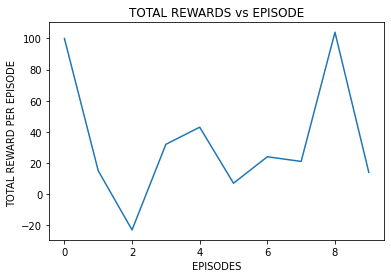

In [14]:
plt.title("TOTAL REWARDS vs EPISODE")
plt.xlabel("EPISODES")
plt.ylabel("TOTAL REWARD PER EPISODE ")
plt.plot(list(range(len(rewardslist))),rewardslist)

**REFERENCES**<br>
1. https://medium.com/swlh/introduction-to-reinforcement-learning-coding-sarsa-part-4-2d64d6e37617<br>
2. https://towardsdatascience.com/reinforcement-learning-101-e24b50e1d292<br>
3. https://deepsense.ai/what-is-reinforcement-learning-the-complete-guide/<br>
4. https://www.geeksforgeeks.org/epsilon-greedy-algorithm-in-reinforcement-learning/<br>
5. https://towardsdatascience.com/double-q-learning-the-easy-way-a924c4085ec3<br>
6. https://www.google.com/search?q=reward+graph+in+reinforcement+learning+model&sxsrf=ALiCzsbNA-FyW-Z11SO_g3hXINfowjeq6w:1651887177338&tbm=isch&source=iu&ictx=1&vet=1&fir=mVVhdljgmHc5tM%252CpR4PwAdWVkD6yM%252C_%253BzpEmLfCc4_z63M%252CsgNTSAOWgc9iEM%252C_%253BE9hgcQQMzZu7PM%252Cf90WdVNtDqE1ZM%252C_%253BxBlOtZJ8gDKZ4M%252CRTy0OHptaQ_jZM%252C_%253Brhbf4KCskB1ARM%252CvmAXlut6BVVG2M%252C_%253Br4eXDxSvZFlJfM%252CsgNTSAOWgc9iEM%252C_%253Bg8BJj3yQhgkx1M%252CrGGbt1VH_xachM%252C_%253BnXc9F0-q0z499M%252CkXIrzXyOzEQLdM%252C_%253BNnlfUMmd50JG9M%252CatIOdoZXPLjfSM%252C_%253BpZcZC5_FV0V1HM%252CvmAXlut6BVVG2M%252C_&usg=AI4_-kSelYYz5h22CC9GHYY9QxGnuJxzLQ&sa=X&ved=2ahUKEwjN2aejn8z3AhWMk4kEHQJKCNgQ9QF6BAgGEAE#imgrc=mVVhdljgmHc5tM